In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

In [5]:
# read data, in this case 103_SHT_SMD.txt at root directory
df = pd.read_csv('103_SHT_SMD.txt', sep='\t', usecols=['SHT40_temp','SHT40_Humidity','A1_Sensor'])

In [6]:
df.head()

,SHT40_temp,SHT40_Humidity,A1_Sensor
0,29.24,43.71,2963
1,29.23,43.74,2962
2,29.22,43.72,2962
3,29.24,43.67,2961
4,29.22,43.70,2962


In [7]:
a1_sensor_data = df['A1_Sensor'].values[7875:]

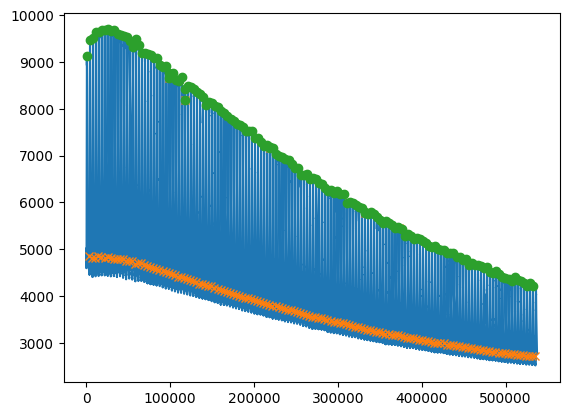

In [79]:
# Find peaks and their properties
peaks, properties = find_peaks(a1_sensor_data, width=50, height=1)

# Get the peak heights
peak_heights = properties['peak_heights']

# Initialize lists to hold the smaller and larger peaks
smaller_peaks = []
larger_peaks = []

# Iterate over the peaks
for i in range(len(peaks) - 1):
    # If the next peak is smaller, label the current peak as a larger peak
    if peak_heights[i] > peak_heights[i + 1]:
        larger_peaks.append(peaks[i])
        smaller_peaks.append(peaks[i + 1])

# Convert lists to numpy arrays for indexing
smaller_peaks = np.array(smaller_peaks)
larger_peaks = np.array(larger_peaks)

# Plot data
plt.plot(a1_sensor_data)

# Overlay smaller peaks with 'x'
plt.plot(smaller_peaks, a1_sensor_data[smaller_peaks], "x")

# Overlay larger peaks with 'o'
plt.plot(larger_peaks, a1_sensor_data[larger_peaks], "o")

plt.show()

In [81]:
# Iterate over the smaller_peaks array
for i in range(len(smaller_peaks) - 1):
    # Get the data between the current and next smaller peak
    data = a1_sensor_data[smaller_peaks[i]:smaller_peaks[i + 1]]
    
    # Write the data to a file
    with open(f'file{i + 1}.txt', 'w') as f:
        for value in data:
            f.write(str(value) + '\n')

<function matplotlib.pyplot.show(close=None, block=None)>

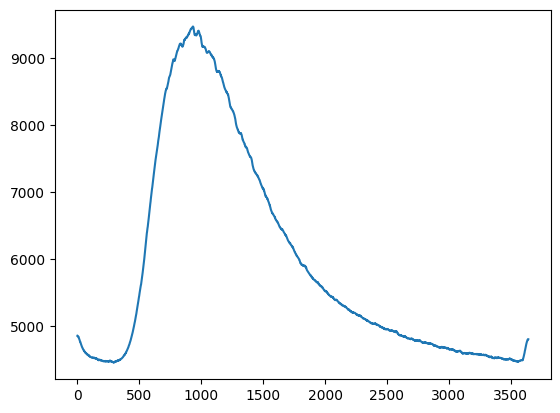

In [85]:
# read data, in this case 103_SHT_SMD.txt at root directory
spdf = pd.read_csv('file1.txt', header=None)
spdf.plot(kind='line', legend=False)
plt.show
